# CAPTSTONE PROJECT 3:

### DATA CLEANING

***

#### CLEAN DATA:
* Import data from NASDAQ API.
* Transform and make useable data.
* Address any NaN or NaT values appropriately

In [1]:
# Import necessary modules for DataFrame cleaning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# import finnhub
import nasdaqdatalink
# from polygon import RESTClient
from dotenv import load_dotenv
# import requests as r
# import json
# import collections as coll

##### PULL DATA FROM API's and Import public table from S & P 500
***

In [2]:
load_dotenv(".env")
NASDAQ_DATA_LINK_API_KEY = os.getenv('NASDAQ_DATA_LINK_API_KEY')
MKTS_API_KEY = os.getenv('MARKETSTACK_API_KEY')
FNH_API_KEY = os.getenv('FINNHUB_API_KEY')
PLY_API_KEY = os.getenv('POLYGON_API_KEY')

# print(f"NASDAQ KEY: {NASDAQ_DATA_LINK_API_KEY}")
# print(f"MARKETSTACK KEY: {MKTS_API_KEY}")
# print(f"FINNHUB KEY: {FNH_API_KEY}")
# print(f"POLYGON KEY: {PLY_API_KEY}")

In [3]:
# Pull data from Nasdaq for BitCoin
table_code = 'QDL/BCHAIN'
nasdaqdatalink.read_key('.env')
ndq_api_bitcoin_df = nasdaqdatalink.get_table(table_code, paginate=True)

In [4]:
ndq_api_bitcoin_df = ndq_api_bitcoin_df.reset_index().drop(columns='None').rename(columns={'code': 'Unique Metrics Identifier', 'date': 'Date of Record', 'value': 'Numerical Bitcoin Metric Value'})

In [5]:
ndq_api_bitcoin_df.head()

,Unique Metrics Identifier,Date of Record,Numerical Bitcoin Metric Value
0,TVTVR,2016-07-17,60.5821
1,TVTVR,2016-07-16,93.1541
2,TVTVR,2016-07-15,76.3548
3,TVTVR,2016-07-14,86.4739
4,TVTVR,2016-07-13,39.4733


In [6]:
ndq_api_bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160837 entries, 0 to 160836
Data columns (total 3 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Metrics Identifier       160837 non-null  object        
 1   Date of Record                  160837 non-null  datetime64[ns]
 2   Numerical Bitcoin Metric Value  160837 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 3.7+ MB


Good news, no missing values.  However the amount of data is very unmanageable and due to the abstraction of the _'Unique Metrics Identifier'_ into a single column. it causes us to have all to have all of the numerical values in a single column which is not good for our analysis purposes. We have our data, but in it's current format it's quite useless.  We will need to transform the table such that it is organized by ascending dates, with the _'Unique Metrics Identifier'_ codes converted to their respective meeanins and having a column for each with their numerical value matching underneath with their corresponding date.

In [7]:
cols_list = list(ndq_api_bitcoin_df['Unique Metrics Identifier'].unique())

In [8]:
cols_list_conv = ['Trade Volume vs Transaction Volume Ratio', 'USD Exchange Trade Volume',
                  'Total Transaction Fees USD', 'Total Transaction Fees', 'Total Output Volume',
                  'Total Bitcoins', 'Transaction Excluding Popular Addresses', 'Number of Transactions per Block',
                  'Total Number of Transactions', 'Number of Transactions', 'Network Deficit', 'Nummber of Unique Addresses Used',
                  'My Wallet Transaction Volume', 'My Wallet Number of Users', 'Number of Transactions per Day',
                  'Market Capitalization', 'Market Price', 'Miners Revenue', 'Miners Optimine?', 'Hash Rate',
                  'Estimated Transaction Volume USD', 'Estimated Transaction Volume', 'Difficulty', 'Cost Percent of Transaction Volume',
                  'Cost per Transaction', 'API Blockchain Size', 'Days Destroyed (Min Age 1 Year)', 'Days Destroyed (Min Age 1 Week)',
                  'Days Destroyed (Min Age 1 Month)', 'Days Destroyed', 'Days Destroyed Cumulutive', 'Average Block Size', 
                  'Median Transaction Confirmation Time']

In [9]:
cols_dict = {cols_list[i]: cols_list_conv[i] for i in range(len(cols_list))}


In [10]:
len(ndq_api_bitcoin_df['Date of Record'].unique())

5579

In [11]:
bitcoin_df = pd.DataFrame(ndq_api_bitcoin_df['Date of Record'].unique())

In [12]:
bitcoin_df = bitcoin_df.rename(columns={0:"date"}).set_index('date')

In [13]:
for col in cols_list:
    bitcoin_df = pd.merge(bitcoin_df, ndq_api_bitcoin_df[ndq_api_bitcoin_df['Unique Metrics Identifier'] == col].rename(columns={'Date of Record': 'date'}).set_index('date'),
                                 on='date', how='left')
    if 'Unique Metrics Identifier_x' in bitcoin_df.columns:
        bitcoin_df.rename(columns={'Numerical Bitcoin Metric Value_x': cols_dict[col]}, inplace=True)
        bitcoin_df.drop(columns='Unique Metrics Identifier_x', inplace=True)
    elif 'Unique Metrics Identifier_y' in bitcoin_df.columns:
        bitcoin_df.rename(columns={'Numerical Bitcoin Metric Value_y': cols_dict[col]}, inplace=True)
        bitcoin_df.drop(columns='Unique Metrics Identifier_y', inplace=True)
    elif 'Unique Metrics Identifier' in bitcoin_df.columns:
        bitcoin_df.rename(columns={'Numerical Bitcoin Metric Value': cols_dict[col]}, inplace=True)
        bitcoin_df.drop(columns='Unique Metrics Identifier', inplace=True)

In [14]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5579 entries, 2016-07-17 to 2024-02-17
Data columns (total 33 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Trade Volume vs Transaction Volume Ratio  2753 non-null   float64
 1   USD Exchange Trade Volume                 5578 non-null   float64
 2   Total Transaction Fees USD                5574 non-null   float64
 3   Total Transaction Fees                    5576 non-null   float64
 4   Total Output Volume                       5576 non-null   float64
 5   Total Bitcoins                            5576 non-null   float64
 6   Transaction Excluding Popular Addresses   5576 non-null   float64
 7   Number of Transactions per Block          5576 non-null   float64
 8   Total Number of Transactions              5576 non-null   float64
 9   Number of Transactions                    5576 non-null   float64
 10  Network Deficit   

In [15]:
bitcoin_df.head()

,Trade Volume vs Transaction Volume Ratio,USD Exchange Trade Volume,Total Transaction Fees USD,Total Transaction Fees,Total Output Volume,Total Bitcoins,Transaction Excluding Popular Addresses,Number of Transactions per Block,Total Number of Transactions,Number of Transactions,...,Cost Percent of Transaction Volume,Cost per Transaction,API Blockchain Size,Days Destroyed (Min Age 1 Year),Days Destroyed (Min Age 1 Week),Days Destroyed (Min Age 1 Month),Days Destroyed,Days Destroyed Cumulutive,Average Block Size,Median Transaction Confirmation Time
date,,,,,,,,,,,,,,,,,,,,,
2016-07-17,60.5821,2.634661e+07,32557.4100,47.8700,2.055307e+06,15765000.0,222808.0,1147.73,143032695.0,171013.0,...,0.8116,7.5900,75808.0400,0.0,0.0,0.0,0.0,1.177605e+10,0.7000,7.7600
2016-07-16,93.1541,2.142396e+06,33605.5500,50.6700,1.965918e+06,15761512.5,178573.0,1160.45,142861682.0,182192.0,...,1.0200,7.3200,75702.3500,0.0,0.0,0.0,0.0,1.177605e+10,0.6800,7.7667
2016-07-15,76.3548,2.692855e+07,36791.9734,55.2255,3.349411e+06,15761175.0,178573.0,1600.60,142483779.0,216081.0,...,0.6200,5.4132,76485.5604,0.0,0.0,0.0,0.0,1.177605e+10,0.7902,9.2300
2016-07-14,86.4739,3.431802e+07,38613.9900,58.3800,2.136184e+06,15759487.5,212927.0,1553.90,142463409.0,220655.0,...,0.7368,5.4900,75487.5800,0.0,0.0,0.0,0.0,1.177605e+10,0.7900,10.7300
2016-07-13,39.4733,2.846618e+06,35233.5000,53.5500,2.253580e+06,15757725.0,214101.0,1677.63,142242754.0,218093.0,...,0.5800,5.0600,75374.0000,0.0,0.0,0.0,0.0,1.177605e+10,0.8100,10.7333


In [16]:
bitcoin_df = bitcoin_df.reset_index().sort_values(by='date')

### EXPLORATORY DATA ANALYSIS: ###
***

We still have outstanding NaN values after successfuly transforming the Dataframe and organizing data points by ascending date.  This has left a substantial degree of missing values and as there are not an equal amount of data points per date in each column.  Thus before deciding what to do with each of these NaN values a moderate degree of Exploratory Data Analysis will be done in order to decide what to do with these values as well as consider what features might be engineered for our modeling and analysis further on in the project.

In [17]:
corr = bitcoin_df.corr(numeric_only=True)

In [18]:
bitcoin_df

,date,Trade Volume vs Transaction Volume Ratio,USD Exchange Trade Volume,Total Transaction Fees USD,Total Transaction Fees,Total Output Volume,Total Bitcoins,Transaction Excluding Popular Addresses,Number of Transactions per Block,Total Number of Transactions,...,Cost Percent of Transaction Volume,Cost per Transaction,API Blockchain Size,Days Destroyed (Min Age 1 Year),Days Destroyed (Min Age 1 Week),Days Destroyed (Min Age 1 Month),Days Destroyed,Days Destroyed Cumulutive,Average Block Size,Median Transaction Confirmation Time
5577,2009-01-02,NaN,0.000000e+00,0.000000e+00,0.0000,50.0000,50.00,1.0,1.0000,1.0,...,0.0000,0.0000,0.0000,NaN,NaN,NaN,NaN,NaN,0.0003,NaN
2752,2009-01-03,0.0,0.000000e+00,0.000000e+00,0.0000,0.0000,50.00,0.0,1.0000,1.0,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
2751,2009-01-04,0.0,0.000000e+00,0.000000e+00,0.0000,0.0000,50.00,0.0,1.0000,1.0,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
2750,2009-01-05,0.0,0.000000e+00,0.000000e+00,0.0000,0.0000,50.00,0.0,1.0000,1.0,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
2749,2009-01-06,0.0,0.000000e+00,0.000000e+00,0.0000,0.0000,50.00,0.0,1.0000,1.0,...,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2757,2024-04-07,NaN,1.684330e+08,1.506788e+06,21.7230,554943.0492,19676262.50,525826.0,3094.8824,985002826.0,...,1.5003,142.9153,562982.1332,NaN,NaN,NaN,NaN,NaN,1.8846,7.2417
2756,2024-04-08,NaN,1.995999e+08,2.366374e+06,33.1196,982666.1872,19677256.25,455285.0,2883.6519,985528264.0,...,0.6357,159.3105,563302.5824,NaN,NaN,NaN,NaN,NaN,1.9379,8.6750
2755,2024-04-09,NaN,4.625718e+08,3.306938e+06,47.2458,837041.0117,19678212.50,453490.0,3108.2945,985984696.0,...,0.6159,148.4618,563608.9741,NaN,NaN,NaN,NaN,NaN,1.8031,8.6000
2754,2024-04-10,NaN,4.856081e+08,4.853314e+06,69.8362,773781.9075,19679118.75,530760.0,3516.9139,986437741.0,...,0.8187,132.0233,563872.2745,NaN,NaN,NaN,NaN,NaN,1.7194,10.3167


<Axes: >

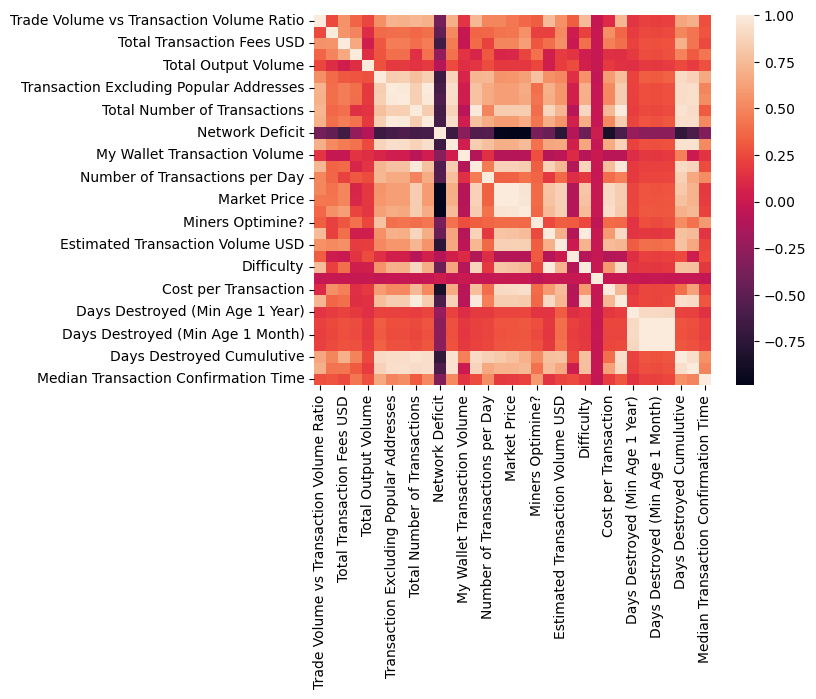

In [19]:
sns.heatmap(corr)

In [20]:
cols_dict

{'TVTVR': 'Trade Volume vs Transaction Volume Ratio',
 'TRVOU': 'USD Exchange Trade Volume',
 'TRFUS': 'Total Transaction Fees USD',
 'TRFEE': 'Total Transaction Fees',
 'TOUTV': 'Total Output Volume',
 'TOTBC': 'Total Bitcoins',
 'NTREP': 'Transaction Excluding Popular Addresses',
 'NTRBL': 'Number of Transactions per Block',
 'NTRAT': 'Total Number of Transactions',
 'NTRAN': 'Number of Transactions',
 'NETDF': 'Network Deficit',
 'NADDU': 'Nummber of Unique Addresses Used',
 'MWTRV': 'My Wallet Transaction Volume',
 'MWNUS': 'My Wallet Number of Users',
 'MWNTD': 'Number of Transactions per Day',
 'MKTCP': 'Market Capitalization',
 'MKPRU': 'Market Price',
 'MIREV': 'Miners Revenue',
 'MIOPM': 'Miners Optimine?',
 'HRATE': 'Hash Rate',
 'ETRVU': 'Estimated Transaction Volume USD',
 'ETRAV': 'Estimated Transaction Volume',
 'DIFF': 'Difficulty',
 'CPTRV': 'Cost Percent of Transaction Volume',
 'CPTRA': 'Cost per Transaction',
 'BLCHS': 'API Blockchain Size',
 'BCDDY': 'Days Destroyed

/tmp/ipykernel_3827/2666148250.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


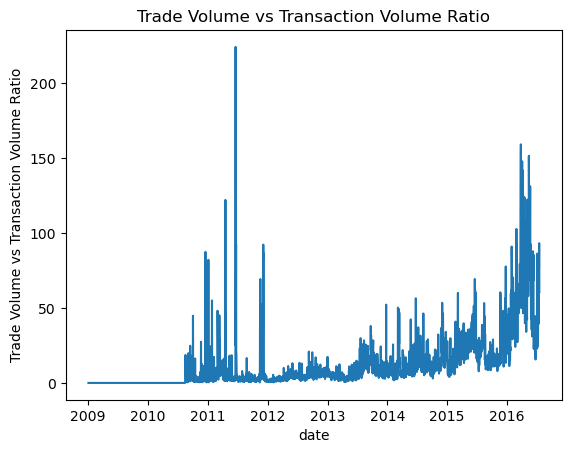

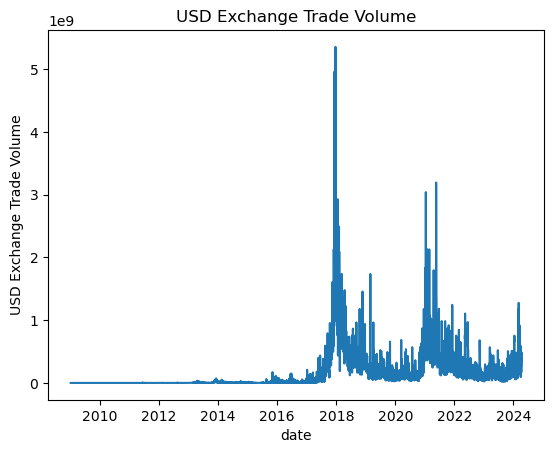

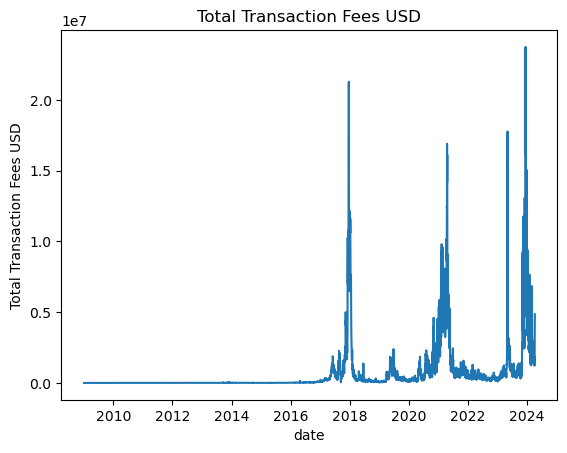

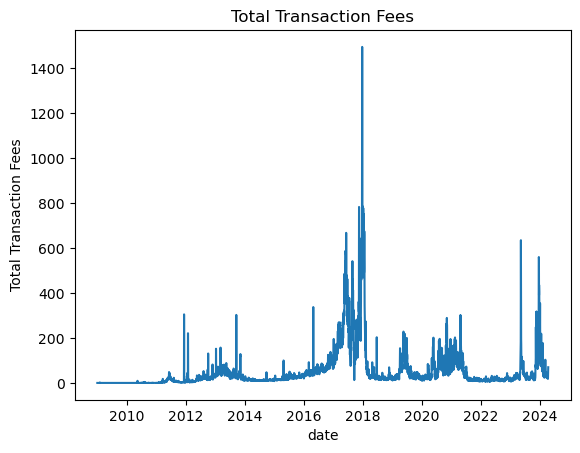

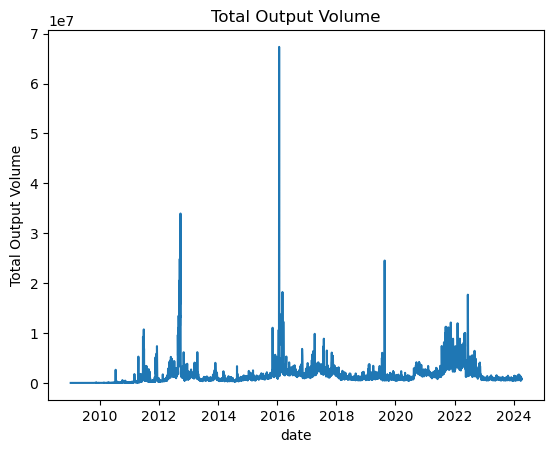

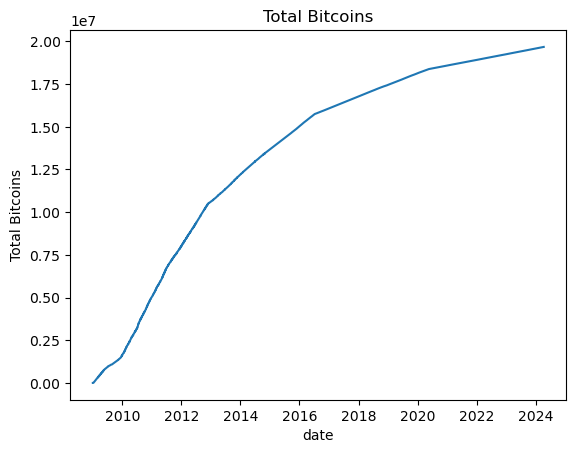

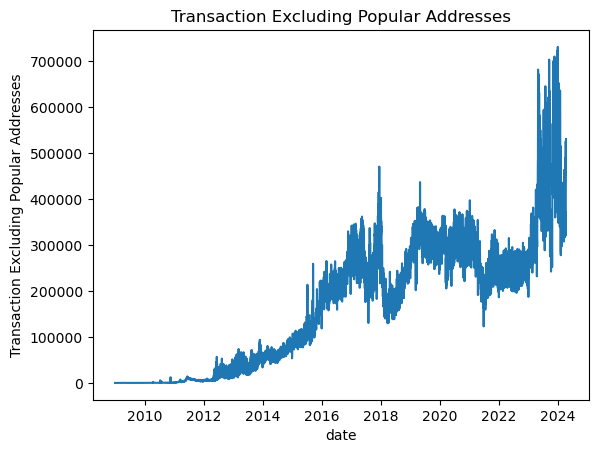

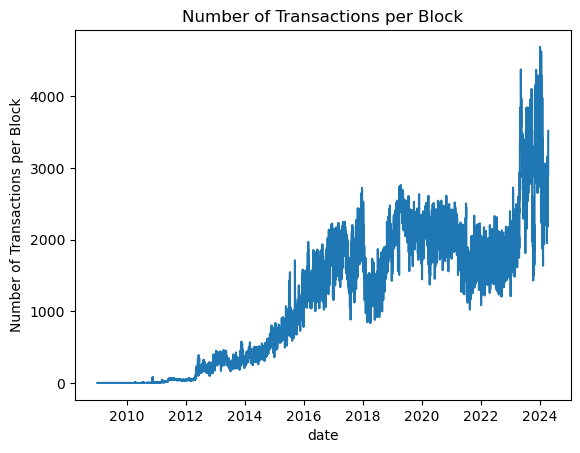

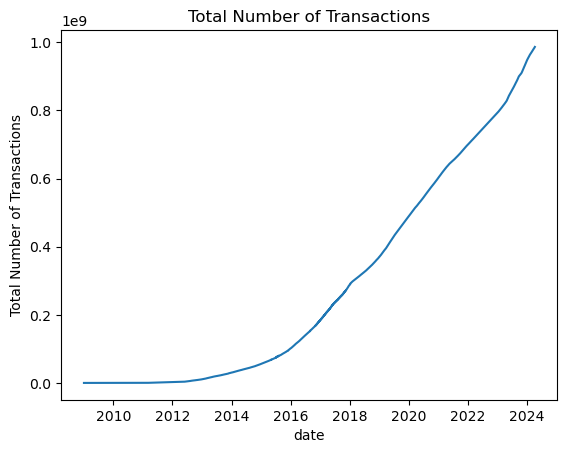

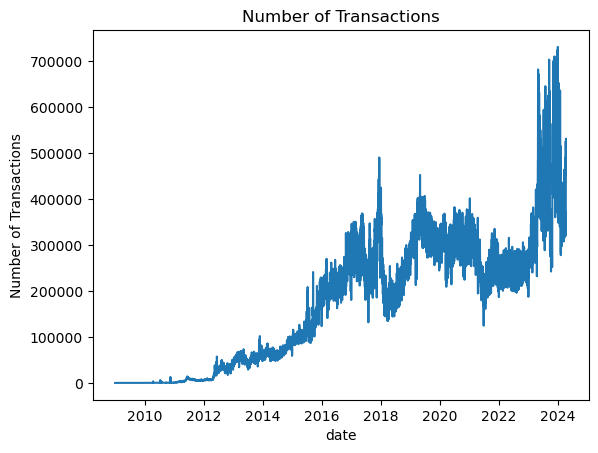

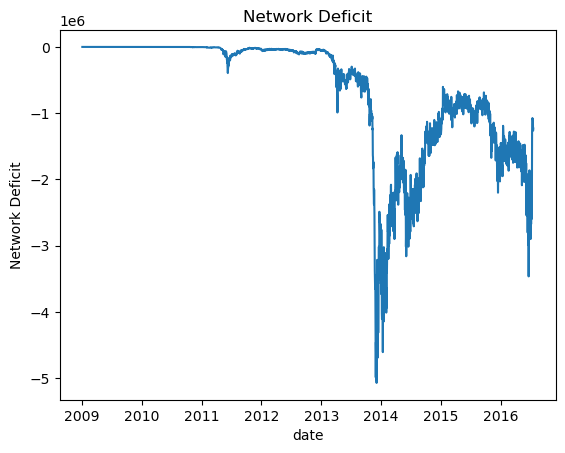

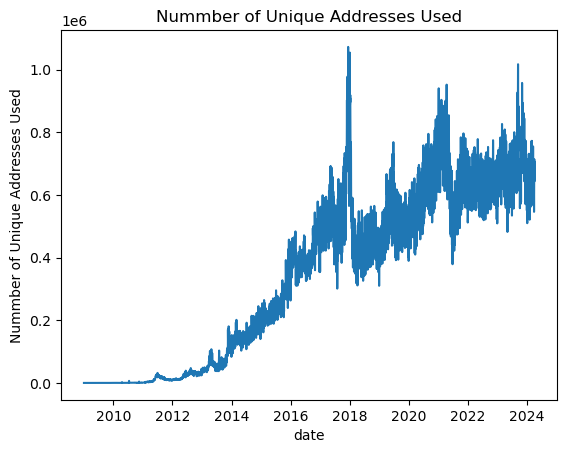

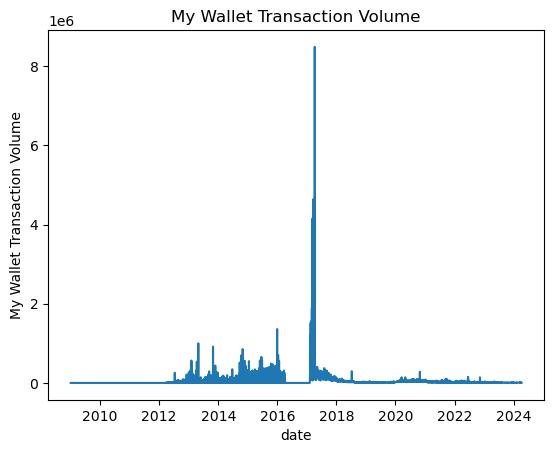

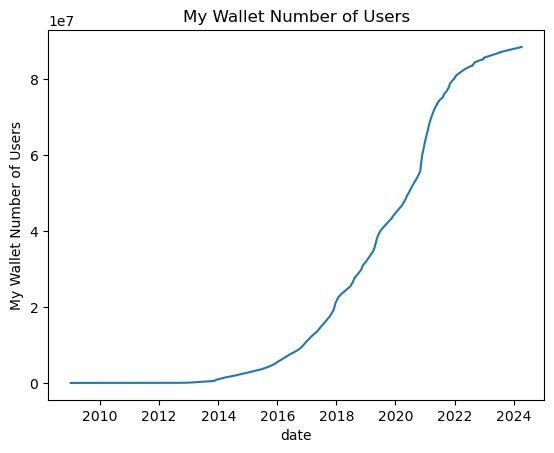

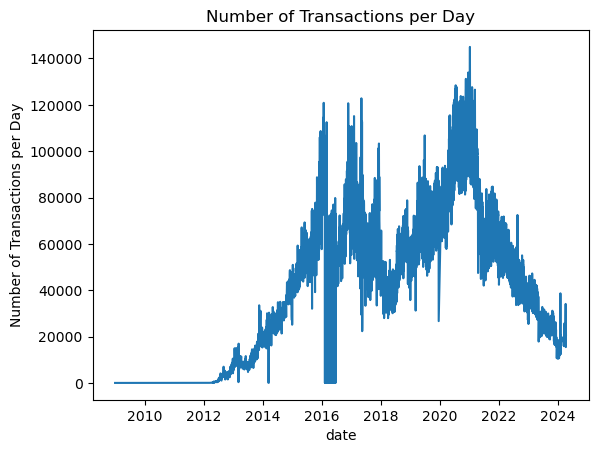

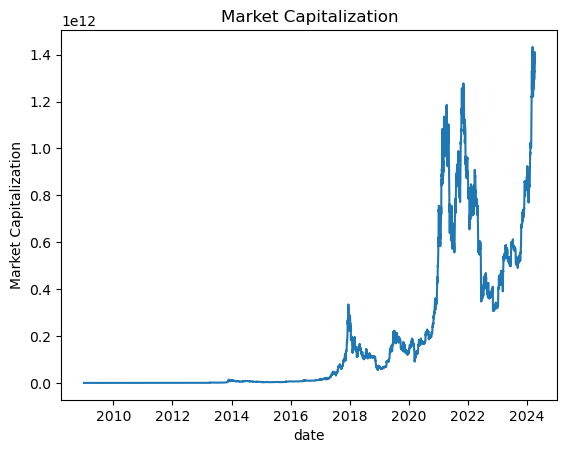

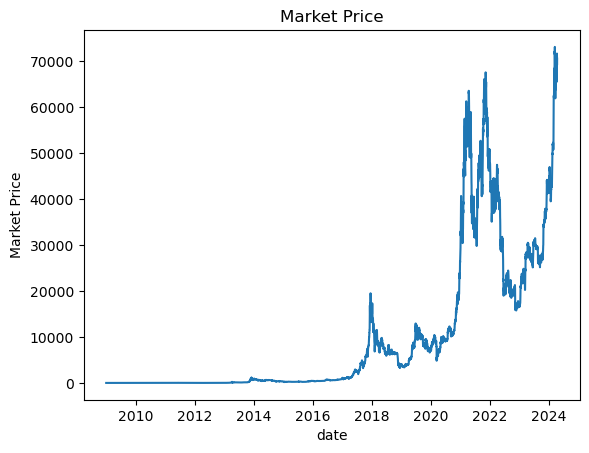

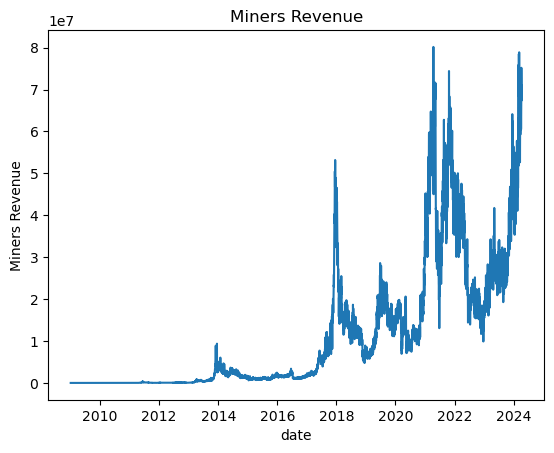

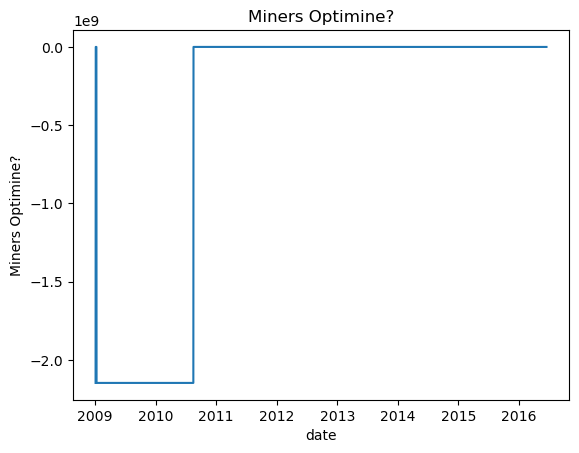

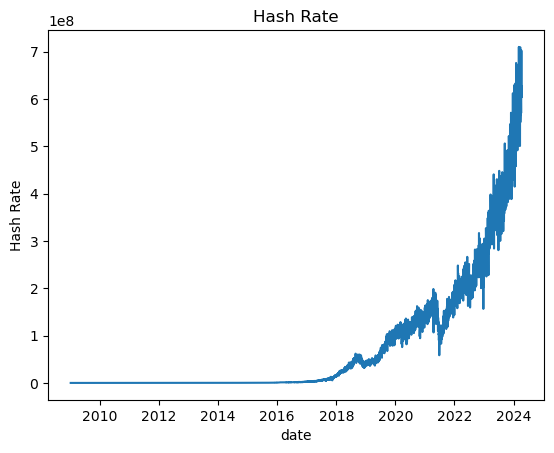

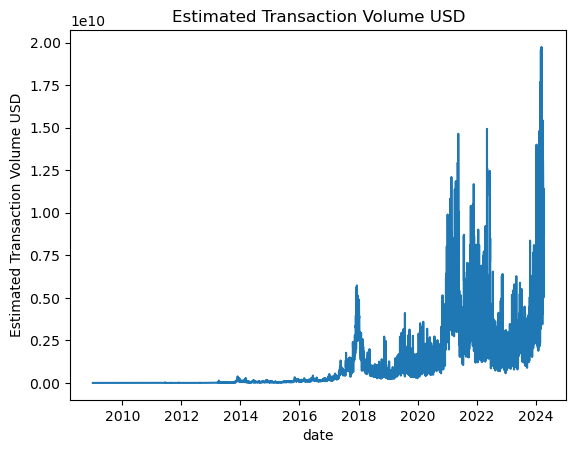

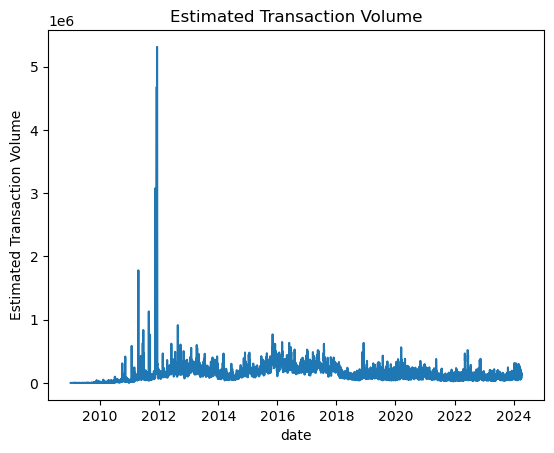

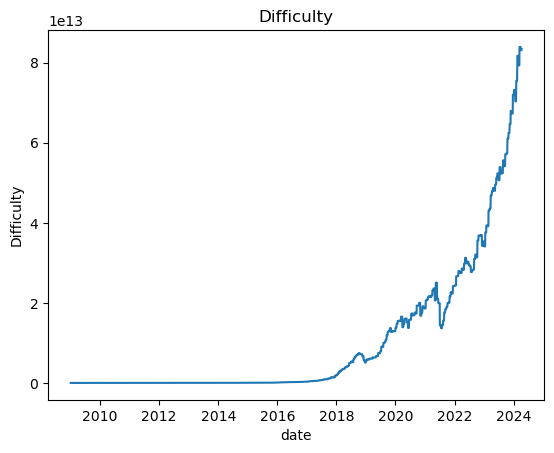

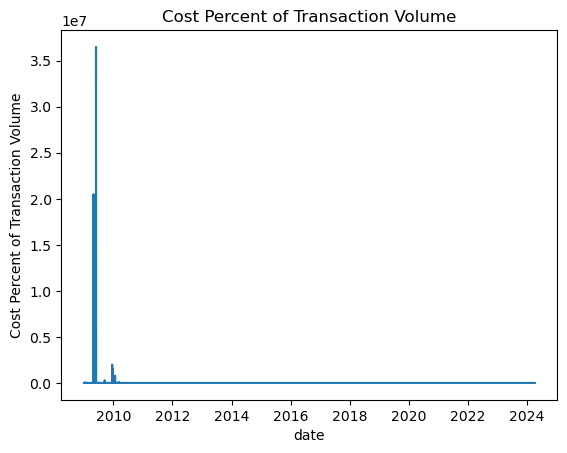

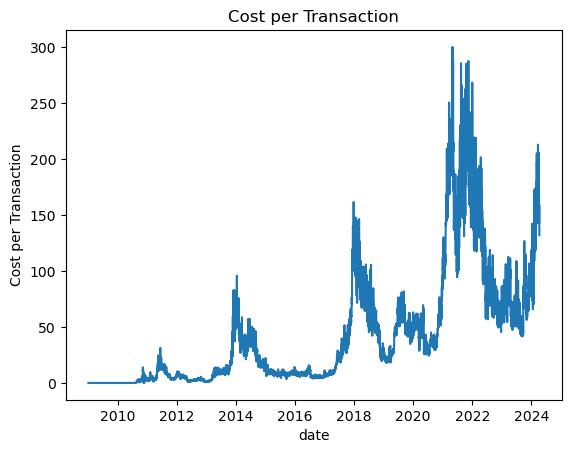

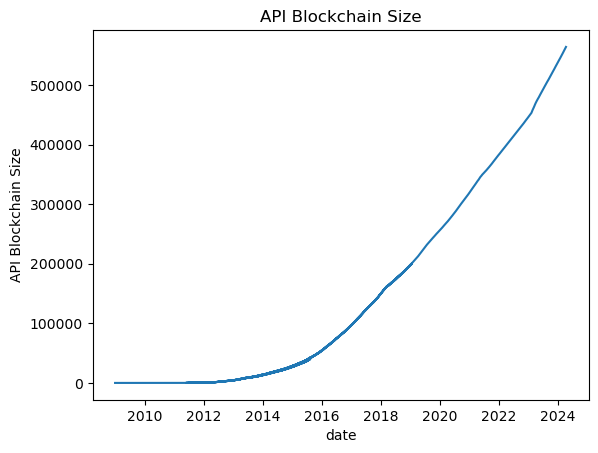

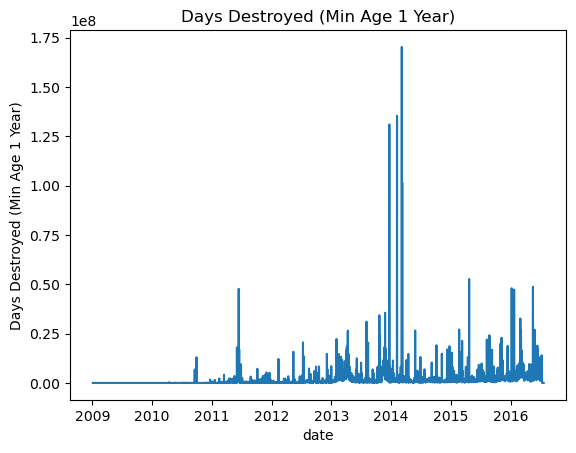

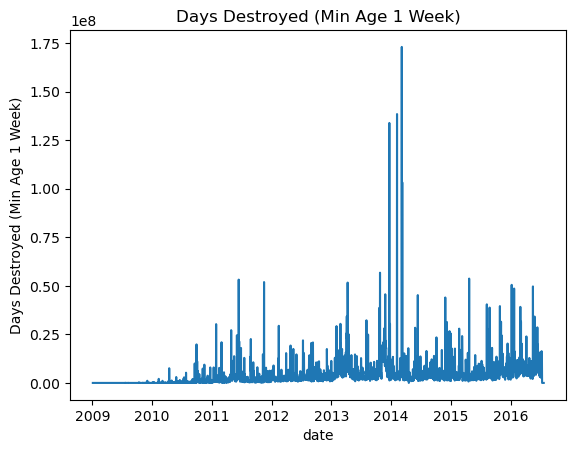

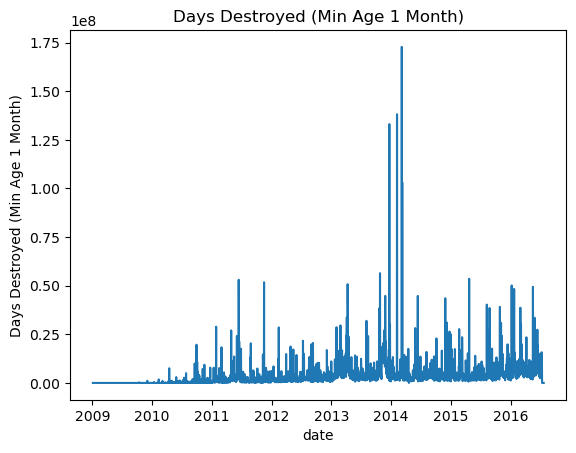

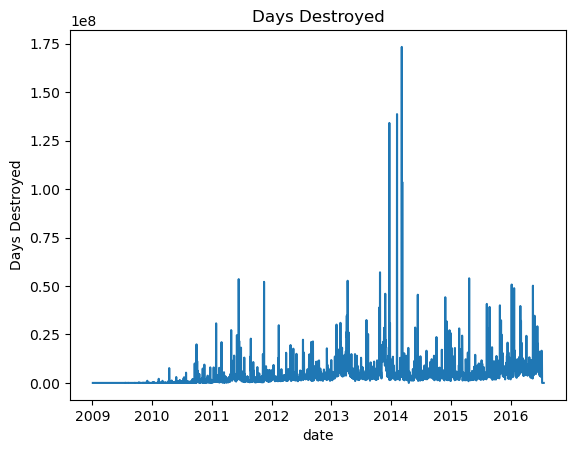

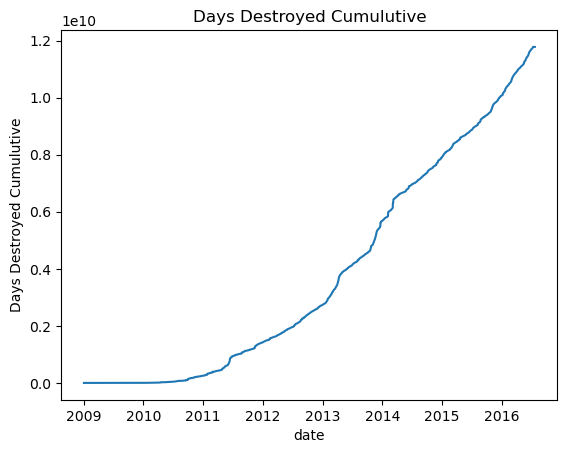

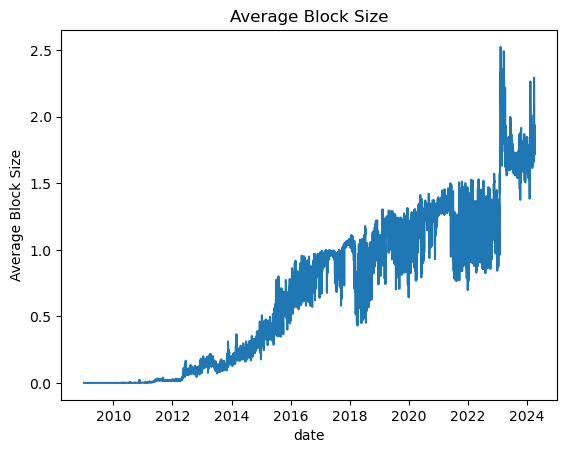

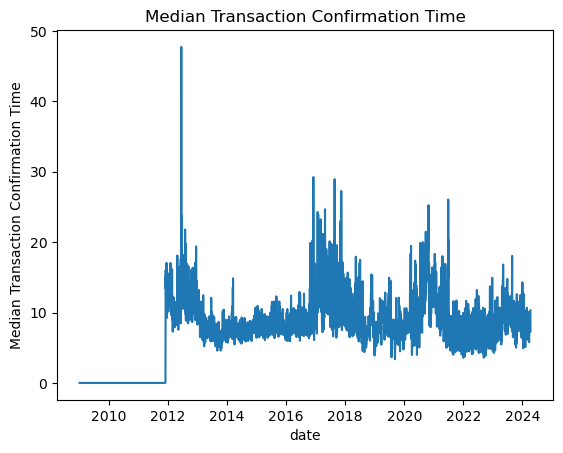

In [21]:
for col in bitcoin_df.drop(columns='date').columns:
    lineplot = bitcoin_df[['date', col]]
    fig, ax = plt.subplots()
    sns.lineplot(lineplot, ax=ax, x='date', y=col)
    plt.title(col)
    plt.plot()
    
    

Based on what is seen here there are periods where certain data wasn't reported, with that being said if we were to drop those columns in the middle it would interrupt the continuity of the other Data Columns.  Therefore we will needs must impute data on a case by case scenario per column on the DataFrame until it is complete and as accurate with bias as we can possible make it.

In [22]:
plt.close()

In [23]:
bitcoin_df.rename(columns={'Nummber of Unique Addresses Used': 'Number of Unique Addresses Used'}, inplace=True)

In [24]:
bitcoin_df.set_index('date', inplace=True)

In [25]:
bitcoin_df[bitcoin_df['Trade Volume vs Transaction Volume Ratio'].isnull() == True]['Trade Volume vs Transaction Volume Ratio']

date
2009-01-02   NaN
2016-07-18   NaN
2016-07-19   NaN
2016-07-20   NaN
2016-07-21   NaN
              ..
2024-04-07   NaN
2024-04-08   NaN
2024-04-09   NaN
2024-04-10   NaN
2024-04-11   NaN
Name: Trade Volume vs Transaction Volume Ratio, Length: 2826, dtype: float64

Trade Volume vs Transaction Volume ratio is just long winded for how many trades were made per transaction.  Therefore we should be able to dived _USD Exchange Trade Volume_ by _Extimated Transaction Volume_ to fill those NaN values in these columns.

In [26]:
bitcoin_df['Trade Volume vs Transaction Volume Ratio'].fillna(bitcoin_df['USD Exchange Trade Volume'] / bitcoin_df['Estimated Transaction Volume USD'], inplace=True)
bitcoin_df.fillna(0.0, inplace=True)

/tmp/ipykernel_3827/1891170870.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bitcoin_df['Trade Volume vs Transaction Volume Ratio'].fillna(bitcoin_df['USD Exchange Trade Volume'] / bitcoin_df['Estimated Transaction Volume USD'], inplace=True)


[]

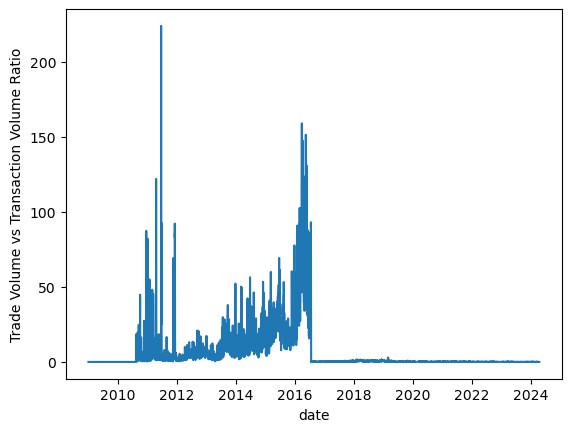

In [27]:
sns.lineplot(bitcoin_df['Trade Volume vs Transaction Volume Ratio'])
plt.plot()

Well assuming I selected the correct columns for performing the calculation, then that would indicate why Bitcoin stopped tracking this. There data values are so low they might as well be zero.  Though I was trying to save this one column it turns out that this along with the other columns which end shortly after the inception of 2016 will need to be dropped.

In [30]:
bitcoin_df.drop(columns=['Trade Volume vs Transaction Volume Ratio', 'Network Deficit', 'Miners Optimine?', 'Days Destroyed (Min Age 1 Year)',
                         'Days Destroyed (Min Age 1 Week)', 'Days Destroyed (Min Age 1 Month)', 'Days Destroyed', 'Days Destroyed Cumulutive'],
                         inplace=True)

In [31]:
null_cols = []

for col in bitcoin_df.columns:
    if np.any(bitcoin_df[col].isnull() == True):
        null_cols.append(col)

null_cols

[]

In [34]:
bitcoin_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5579 entries, 2009-01-02 to 2024-04-11
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   USD Exchange Trade Volume                5579 non-null   float64
 1   Total Transaction Fees USD               5579 non-null   float64
 2   Total Transaction Fees                   5579 non-null   float64
 3   Total Output Volume                      5579 non-null   float64
 4   Total Bitcoins                           5579 non-null   float64
 5   Transaction Excluding Popular Addresses  5579 non-null   float64
 6   Number of Transactions per Block         5579 non-null   float64
 7   Total Number of Transactions             5579 non-null   float64
 8   Number of Transactions                   5579 non-null   float64
 9   Number of Unique Addresses Used          5579 non-null   float64
 10  My Wallet Transaction Volume  

Now we save it as a .csv file for further use in the project.

In [39]:
# Linux
bitcoin_df.to_csv('./Data/bitcoin_df_cleaned')

# Windows
# bitcoin_df.to_csv(r'Capstone_Project_3\Data')

With that out of the way it's time to do the more thorough EDA.  There are a number of questions that come up from just that sneak peak we gave ourselves earlier on:
- Why does the 'Median Transaction Confirmation Time', 'Cost per Transaction', 'Blockchain Size', etc all seem to zero out at the same time? was there a crash I was unaware of? and if so what caused it and does this invalidate the data prior to that time period?
- Almost in a bizarre form of correlation to this phenomenon, the data corresponding to destroyed bitcoins conforms completely to the time prior to the the bitcoin vanishing act around day 2000 of the data set.
- Also there is a number of data that show a clear logarithmic correlation to one another: 'API Blockchain Size', 'Difficulty', and 'Hash Rate'

I should like to explore these points of interest and see if I can't extract a bit of the noise prior to really preparing these data for ARIMA, and LSTM models, and perhaps as an experiment I might do a RandomForestRegressor as well.